In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
housing=pd.read_csv("/content/drive/My Drive/Colab Notebooks/housing_machine/housing_data.csv")

In [106]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
housing.drop("Unnamed: 25", axis=1, inplace=True) 

Drop is for delete the entire coloumns and inplace for change should maintain in main data as well


In [108]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 26 columns):
CRIM           505 non-null float64
ZN             505 non-null float64
INDUS          505 non-null float64
CHAS           505 non-null int64
NOX            505 non-null float64
RM             505 non-null float64
AGE            505 non-null float64
DIS            505 non-null float64
RAD            505 non-null int64
TAX            505 non-null int64
PTRATIO        505 non-null float64
B              505 non-null float64
LSTAT          505 non-null float64
MEDV           505 non-null float64
Unnamed: 14    0 non-null float64
Unnamed: 15    0 non-null float64
Unnamed: 16    0 non-null float64
Unnamed: 17    0 non-null float64
Unnamed: 18    0 non-null float64
Unnamed: 19    0 non-null float64
Unnamed: 20    0 non-null float64
Unnamed: 21    0 non-null float64
Unnamed: 22    0 non-null float64
Unnamed: 23    0 non-null float64
Unnamed: 24    0 non-null float64
Unnamed: 26    0 non-nu

In [109]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 26
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.284059,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.703195,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
housing.drop(housing.iloc[:,14:],axis=1,inplace=True)
housing["RAD"].value_counts()

24    132
5     115
4     110
3      38
6      26
8      24
2      24
1      19
7      17
Name: RAD, dtype: int64

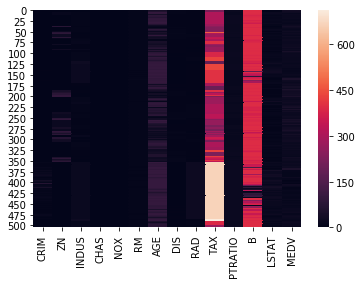

In [111]:
sns.heatmap(housing)

Train-Test Splitting


In [0]:
def split_train_test(data,test_ratio):
   np.random.seed(42)
   shuffled=np.random.permutation(len(data))
   test_set_size=int(len(data)*test_ratio)
   train_indices=shuffled[:test_set_size]
   test_indices=shuffled[test_set_size:]
   return data.iloc[train_indices],data.iloc[test_indices]


In [113]:
train_set,test_set=split_train_test(housing,0.8)
print(len(train_set)," ",len(test_set))

404   101


Same task using sklearn 

In [114]:
from sklearn.model_selection import train_test_split  
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)
print(len(train_set)," ",len(test_set))

404   101


In [0]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing["CHAS"]):
  strat_train=housing.loc[train_index]
  strat_test=housing.loc[test_index]

In [116]:
#housing.describe()
corr_matrics=housing.corr()
corr_matrics["MEDV"].sort_values(ascending=False)



MEDV       1.000000
RM         0.695365
ZN         0.360393
B          0.333394
DIS        0.249896
CHAS       0.175364
AGE       -0.376932
RAD       -0.381690
CRIM      -0.388249
NOX       -0.427295
TAX       -0.468543
INDUS     -0.484126
PTRATIO   -0.508411
LSTAT     -0.738187
Name: MEDV, dtype: float64

In [117]:
from sklearn.impute import SimpleImputer               #filling missing attributes
imputer=SimpleImputer(strategy='median')
imputer.fit(housing)


SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [118]:
imputer.statistics_

array([2.5915e-01, 0.0000e+00, 9.6900e+00, 0.0000e+00, 5.3800e-01,
       6.2080e+00, 7.7700e+01, 3.1992e+00, 5.0000e+00, 3.3000e+02,
       1.9100e+01, 3.9143e+02, 1.1380e+01, 2.1200e+01])

In [0]:
a=imputer.transform(housing)
housing_a=pd.DataFrame(a,columns=housing.columns)


In [120]:
housing=strat_train.drop("MEDV",axis=1)
housing_lable=strat_train["MEDV"].copy()
housing.shape

(404, 13)

In [121]:
housing_a.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7


PipeLine Start from here


In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([('imputer',SimpleImputer(strategy='median')),
              ('std_scaler',StandardScaler()),])


In [0]:
# housing_update_pipeline=my_pipeline.fit_transform(strat_test)
# new_test=pd.DataFrame(housing_update_pipeline,columns=strat_test.columns)
# new_predic

Now select a desired model


In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor  # for RandomForest Regressor
# model=LinearRegression()
#model=DecisionTreeRegressor()  # Overfit chances 
model=RandomForestRegressor()
model.fit(housing,housing_lable)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Evaluation of Model


In [125]:
from sklearn.metrics import mean_squared_error
housing_prediction=model.predict(housing)
error_mse=mean_squared_error(housing_lable,housing_prediction)
error_rootmse=np.sqrt(error_mse)
error_rootmse

1.169074038047054

CrossOver checking 

In [126]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,housing,housing_lable,scoring='neg_mean_squared_error',cv=10)
rmse_score=np.sqrt(-score)
print(rmse_score,"\nMean: ",rmse_score.mean(),"\n Standered Deviation",rmse_score.std())


[3.193906   2.53859976 5.04373773 2.73316839 2.75758097 2.5315502
 2.81612171 2.96988516 2.04891028 4.38200838] 
Mean:  3.101546857410746 
 Standered Deviation 0.8673456196041437


Testing the model on test data set


In [127]:
X_test=strat_test.drop("MEDV",axis=1)
y_test=strat_test["MEDV"].copy()
x_prepared =my_pipeline.fit_transform(X_test)
x_predict=model.predict(x_prepared)
mean_s_error=mean_squared_error(x_predict,y_test)
root_mean_s_error=np.sqrt(mean_s_error)
root_mean_s_error

19.247389242015746

Main Code for python file using Visual Studio Code 


In [128]:
from joblib import dump,load
dump(model,"/content/drive/My Drive/Colab Notebooks/housing_machine/House_price.joblib")

['/content/drive/My Drive/Colab Notebooks/housing_machine/House_price.joblib']